In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Organize a dataframe of patient observations

In [38]:
data = pd.read_csv("observations.csv")

patient_ids = set()

for patient_id in data["PATIENT"]:
    patient_ids.add(patient_id)
patient_ids = list(patient_ids)
patient_ids.sort()

In [39]:
columns = ["patient_id", "Body Height", "Body Weight", "Body Mass Index", "Body temperature", 
          "Respiratory rate", "Systolic Blood Pressure", "Triglycerides", "Hemoglobin [Mass/volume] in Blood"]
df = pd.DataFrame(columns = columns)
df["patient_id"] = patient_ids
df.head()

,patient_id,Body Height,Body Weight,Body Mass Index,Body temperature,Respiratory rate,Systolic Blood Pressure,Triglycerides,Hemoglobin [Mass/volume] in Blood
0,00185faa-2760-4218-9bf5-db301acf8274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0042862c-9889-4a2e-b782-fac1e540ecb4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0047123f-12e7-486c-82df-53b3a450e365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010d4a3a-2316-45ed-ae15-16f01c611674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01207ecd-9dff-4754-8887-4652eda231e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
patients = []
descriptions = []
values = []   

for index, row in data[["PATIENT", "DESCRIPTION", "VALUE"]].iterrows():
    if row["DESCRIPTION"] in columns:
        for column in columns:
            if row["DESCRIPTION"] == column:
                patients.append(row["PATIENT"])
                descriptions.append(column)
                values.append(row["VALUE"])                  

In [41]:
for index, row in df.iterrows():
    for pat, desc, val in zip(patients, descriptions, values):
        if pat == row["patient_id"]:
            df.loc[df.patient_id == pat, desc] = val      

In [45]:
# df = df.set_index("patient_id", drop = True)

# df = df.rename(columns = dict(zip(range(8), columns[1:])))

df.head()

,Body Height,Body Weight,Body Mass Index,Body temperature,Respiratory rate,Systolic Blood Pressure,Triglycerides,Hemoglobin [Mass/volume] in Blood
patient_id,,,,,,,,
00185faa-2760-4218-9bf5-db301acf8274,177.7,64.9,20.6,37.5,14.0,107.0,NaN,13.6
0042862c-9889-4a2e-b782-fac1e540ecb4,126.7,25.6,15.9,37.6,13.0,115.0,NaN,16.5
0047123f-12e7-486c-82df-53b3a450e365,176.5,87.6,28.1,NaN,14.0,118.0,121.1,12.0
010d4a3a-2316-45ed-ae15-16f01c611674,170.8,87.0,29.8,37.4,15.0,118.0,NaN,17.3
01207ecd-9dff-4754-8887-4652eda231e2,70.9,9.4,NaN,NaN,14.0,136.0,NaN,15.5


### Fill null values with the mean of each column

In [49]:
# df = pd.read_csv("sample_observations_by_patient.csv")
# df = df.rename(columns = dict(zip(range(8), columns[1:])))
imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')
df = imp_mean.fit_transform(df)
df = pd.DataFrame(df)
df = df.rename(columns = dict(zip(range(8), columns[1:])))
# df.to_csv("sample_observations_by_patient.csv")
df.head()


,Body Height,Body Weight,Body Mass Index,Body temperature,Respiratory rate,Systolic Blood Pressure,Triglycerides,Hemoglobin [Mass/volume] in Blood
0,177.7,64.9,20.600000,37.500000,14.0,107.0,131.465247,13.6
1,126.7,25.6,15.900000,37.600000,13.0,115.0,131.465247,16.5
2,176.5,87.6,28.100000,37.640559,14.0,118.0,121.100000,12.0
3,170.8,87.0,29.800000,37.400000,15.0,118.0,131.465247,17.3
4,70.9,9.4,26.419312,37.640559,14.0,136.0,131.465247,15.5


## Normalize

In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled).head()

,0,1,2,3,4,5,6,7,8
0,-1.730572,0.691564,-0.268611,-1.267559e+00,-0.415361,-0.040192,-1.016084,-1.415949e-15,-0.606133
1,-1.727614,-1.413982,-1.931338,-2.291310e+00,-0.119855,-0.911768,-0.437265,-1.415949e-15,1.085351
2,-1.724656,0.642022,0.691794,3.660864e-01,0.000000,-0.040192,-0.220208,-5.163890e-01,-1.539365
3,-1.721698,0.406696,0.666409,7.363793e-01,-0.710867,0.831384,-0.220208,-1.415949e-15,1.551967
4,-1.718739,-3.717697,-2.616737,7.738498e-16,0.000000,-0.040192,1.082134,-1.415949e-15,0.502081


## Cluster where K = 2

In [19]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')

kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Evaluate: calculate inertia

In [20]:
kmeans.inertia_

7216.928961237729

## Optimize K

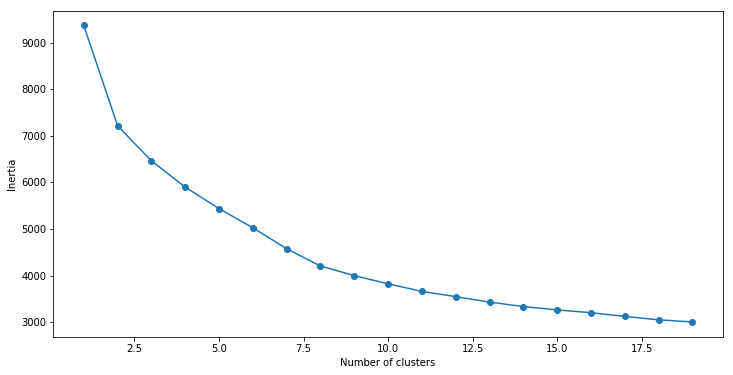

In [38]:
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init = "k-means++")
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({"Cluster": range(1, 20), "SSE": SSE})
plt.figure(figsize = (12, 6))
plt.plot(frame["Cluster"], frame["SSE"], marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


## Cluster where K = 15

In [39]:
# k means using 15 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 15, init = 'k-means++')
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)
print(pred) # returns a list of clusters for each row

[ 3  0  1 ... 13  4  0]


## Analyze cluster populations

In [40]:
frame = pd.DataFrame(df_scaled)
frame["cluster"] = pred
frame["cluster"].value_counts()

4     215
14    129
7     117
12    116
1     102
8     100
3      78
6      69
0      69
10     56
9      36
13     34
5      31
2      18
11      1
Name: cluster, dtype: int64

## Examine cluster 11

In [41]:
frame.loc[frame.cluster == 11]

,0,1,2,3,4,5,6,7,cluster
467,0.476881,0.450635,0.235395,0.0,-1.783344,-0.437265,15.819346,1.260332,11


In [42]:
df = pd.DataFrame(df)
df = df.rename(columns = dict(zip(range(8), columns[1:])))
df.iloc[[467]]

,Body Height,Body Weight,Body Mass Index,Body temperature,Respiratory rate,Systolic Blood Pressure,Triglycerides,Hemoglobin [Mass/volume] in Blood
467,172.5,81.9,27.5,37.640559,12.0,115.0,449.0,16.8


## Compare

In [43]:
df.iloc[[465, 466, 467, 468, 469, 470]]


,Body Height,Body Weight,Body Mass Index,Body temperature,Respiratory rate,Systolic Blood Pressure,Triglycerides,Hemoglobin [Mass/volume] in Blood
465,168.3,85.6,30.2,37.200000,15.0,102.0,119.3,13.0
466,172.7,82.7,27.7,37.640559,12.0,134.0,141.6,16.1
467,172.5,81.9,27.5,37.640559,12.0,115.0,449.0,16.8
468,162.2,78.5,29.8,37.600000,13.0,128.0,114.9,14.3
469,165.0,74.5,27.4,37.640559,14.0,121.0,119.2,15.4
470,190.2,98.0,27.1,37.640559,12.0,127.0,157.8,12.2


### Patients with high triglycerides 

In [45]:
df.loc[df["Triglycerides"] >= 200] 

,Body Height,Body Weight,Body Mass Index,Body temperature,Respiratory rate,Systolic Blood Pressure,Triglycerides,Hemoglobin [Mass/volume] in Blood
467,172.5,81.9,27.5,37.640559,12.0,115.0,449.0,16.8
533,184.5,93.2,27.4,37.000000,14.0,123.0,245.9,12.1
901,182.3,95.3,28.7,37.900000,13.0,112.0,288.8,15.3
1058,177.4,92.4,29.4,37.640559,14.0,127.0,239.7,16.0


## Data Summary

In [34]:

df = pd.DataFrame(df)
df = df.rename(columns = dict(zip(range(8), columns[1:])))
heights = df["Body Height"]
np.mean(list(heights))
df.describe()

,Body Height,Body Weight,Body Mass Index,Body temperature,Respiratory rate,Systolic Blood Pressure,Triglycerides,Hemoglobin [Mass/volume] in Blood,8
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,585.000000,160.949103,71.248847,26.419312,37.640559,14.046114,121.043553,131.465247,14.639197
std,338.182889,24.232094,23.645961,4.592922,0.338548,1.147837,13.827162,20.081134,1.715204
min,0.000000,51.500000,3.100000,13.700000,37.000000,12.000000,99.000000,100.100000,6.700000
25%,292.500000,158.300000,64.550000,24.700000,37.600000,13.000000,112.000000,122.800000,13.200000
50%,585.000000,166.200000,76.800000,27.700000,37.640559,14.000000,119.000000,131.465247,14.600000
75%,877.500000,174.700000,86.200000,29.300000,37.640559,15.000000,128.000000,134.050000,16.100000
max,1170.000000,198.700000,130.200000,48.500000,39.300000,16.000000,196.000000,449.000000,17.500000


## Visualize Outliers 

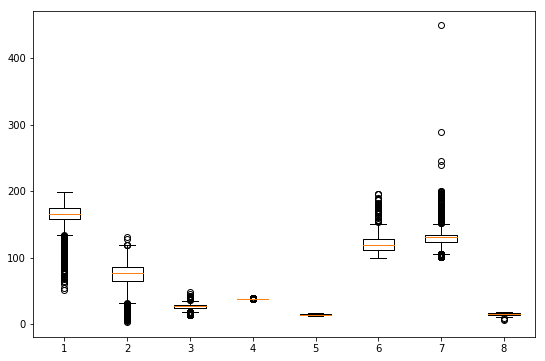

In [65]:
boxes = [list(df[column]) for column in columns[1:]]

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
ax.set_xticklabels(labels=columns[1:])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

bp = ax.boxplot(boxes)